# Step:1 Business problem understanding

This dataset contains information about employees in a company, including their educational backgrounds, work history, demographics, and employment-related factors. It has been anonymized to protect privacy while still providing valuable insights into the workforce.

# Step :2 Data Understanding

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df=pd.read_csv(r"C:\python divers\Employee.csv")
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


**Education**: The educational qualifications of employees, including degree, institution, and field of study.

**Joining Year**: The year each employee joined the company, indicating their length of service.

**City**: The location or city where each employee is based or works.

**Payment Tier**: Categorization of employees into different salary tiers.

**Age**: The age of each employee, providing demographic insights.

**Gender**: Gender identity of employees, promoting diversity analysis.

**Ever Benched**: Indicates if an employee has ever been temporarily without assigned work.

**Experience in Current Domain**: The number of years of experience employees have in their current field.

**Leave or Not**: a target column

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [56]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [57]:
continous=["Age","JoiningYear"]
discrete_count=["PaymentTier","ExperienceInCurrentDomain","LeaveOrNot"]
discrete_categorical=["Education"," City","Gender"," EverBenched"]

**Exploratory Data Analysis**

In [58]:
df[continous].skew()

Age            0.905195
JoiningYear   -0.113462
dtype: float64

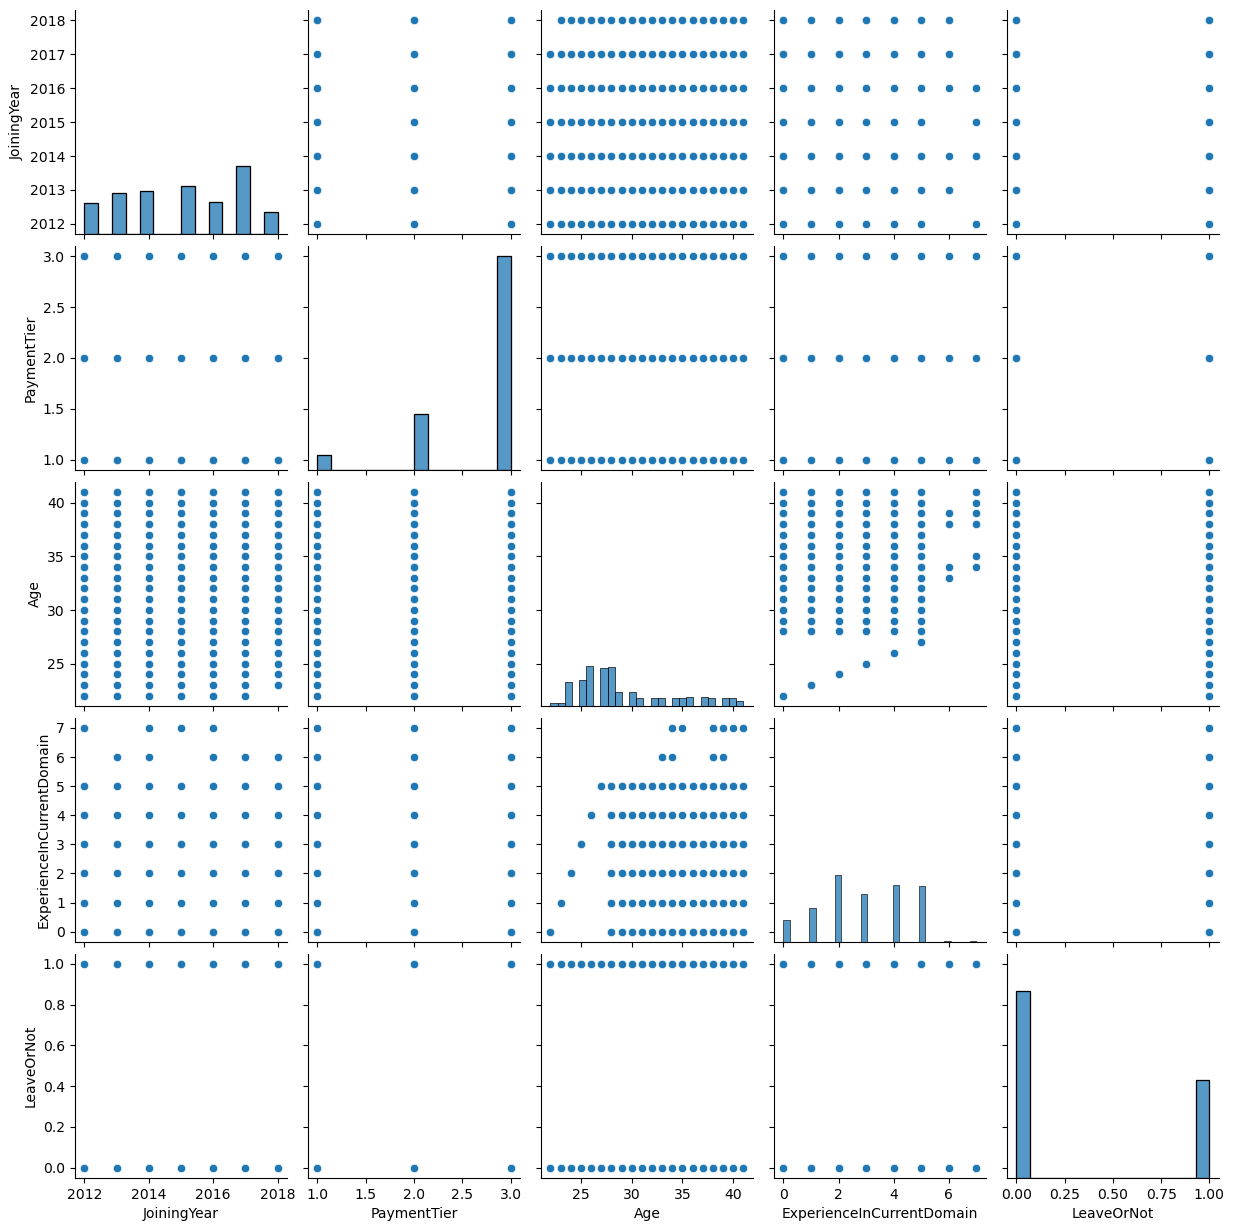

In [59]:
sns.pairplot(df)
plt.show()

In [60]:
df[continous].describe()

,Age,JoiningYear
count,4653.000000,4653.000000
mean,29.393295,2015.062970
std,4.826087,1.863377
min,22.000000,2012.000000
25%,26.000000,2013.000000
50%,28.000000,2015.000000
75%,32.000000,2017.000000
max,41.000000,2018.000000


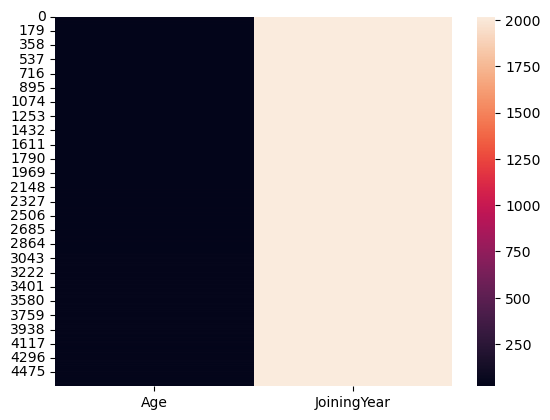

In [61]:
sns.heatmap(df[continous])
plt.show()

In [62]:
df[discrete_count].describe()

,PaymentTier,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000
mean,2.698259,2.905652,0.343864
std,0.561435,1.558240,0.475047
min,1.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000
50%,3.000000,3.000000,0.000000
75%,3.000000,4.000000,1.000000
max,3.000000,7.000000,1.000000


In [63]:
df["Education"].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [64]:
df["Education"].value_counts()

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

In [65]:
df["City"].unique()

array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

In [66]:
df["City"].value_counts()

Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64

In [67]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [68]:
df["Gender"].value_counts()

Male      2778
Female    1875
Name: Gender, dtype: int64

In [69]:
df["EverBenched"].unique()

array(['No', 'Yes'], dtype=object)

In [70]:
df["EverBenched"].value_counts()

No     4175
Yes     478
Name: EverBenched, dtype: int64

# Step:3 Data Preprocessing

**Checking for missing values**

In [71]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [72]:
#No cleaning there is no wrong data and missing values

**Detection of outliers**

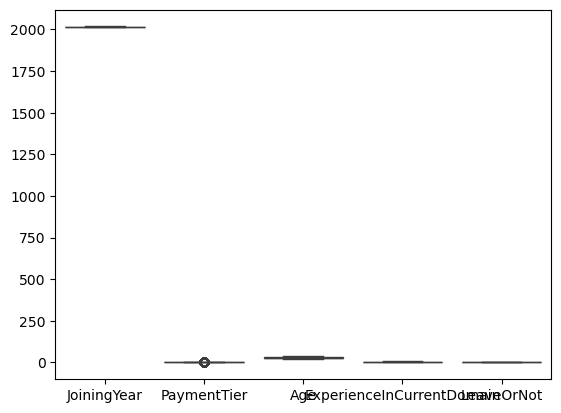

In [73]:
sns.boxplot(df)
plt.show()

**Data Wrangling**

In [77]:
df=df.drop(columns="City")
df

,Education,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,1,2017,3,34,1,0,0,0
1,1,2013,1,28,0,0,3,1
2,1,2014,3,38,0,0,2,0
3,2,2016,3,27,1,0,5,1
4,2,2017,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...
4648,1,2013,3,26,0,0,4,0
4649,2,2013,2,37,1,0,2,1
4650,2,2018,3,27,1,0,5,1
4651,1,2012,3,30,1,1,2,0


In [75]:
df["Education"]=df["Education"].replace({"Bachelors":1,"Masters":2,"PHD":3})
df["Gender"]=df["Gender"].replace({"Male":1,"Female":0})
df["EverBenched"]=df["EverBenched"].replace({"Yes":1,"No":0})

In [78]:
df

,Education,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,1,2017,3,34,1,0,0,0
1,1,2013,1,28,0,0,3,1
2,1,2014,3,38,0,0,2,0
3,2,2016,3,27,1,0,5,1
4,2,2017,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...
4648,1,2013,3,26,0,0,4,0
4649,2,2013,2,37,1,0,2,1
4650,2,2018,3,27,1,0,5,1
4651,1,2012,3,30,1,1,2,0


In [79]:
df.to_excel('cleaned employee data.xlsx')

In [80]:
pwd

'C:\\Users\\Aravind\\classification project'